In [2]:
from pathlib import Path
import tifffile

In [4]:
# img_path = Path('/Users/mrestrepo/Documents/Personales/palmas/20250519/20250519_LaBonga_RGB_agg_CF8_8bit_unsig.tif')
img_path = Path('/Users/mrestrepo/Documents/Personales/palmas/20250312_Guayacanes/20250312_Guayacanes.tif')

In [5]:

# Open the TIFF file using memmap
try:
    tif_file = tifffile.memmap(str(img_path))

    # Access a portion of the image data (e.g., a slice)
    image_slice = tif_file[0:100, 0:100]

    # Work with the image slice (it will be loaded into memory as needed)
    print(f"Shape of the slice: {image_slice.shape}")
    print(f"Data type of the slice: {image_slice.dtype}")

except FileNotFoundError:
    print("Error: The specified TIFF file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

finally:
  # Close the memmap object to release the file handle
  if 'tif_file' in locals():
    del tif_file

<tifffile.TiffPages @9249993634> invalid offset to first page 9249993634


An error occurred: list index out of range


In [73]:
tif_file = tifffile.imread(str(img_path))


<tifffile.TiffPage 0 @162243802> parsing GDAL_NODATA tag raised ValueError('-2147483648 is not castable to uint8')


In [53]:
import PIL
from PIL import Image

In [74]:
img = Image.open(str(img_path))

In [75]:
type(img)

PIL.TiffImagePlugin.TiffImageFile

In [76]:
width, height = img.size
width, height

(6393, 8438)

In [77]:
tile_width, tile_height = 640, 448

In [78]:
x_offsets = [0] + sorted(np.arange(width, 0, -tile_width).tolist())[:-1]
x_offsets

[0, 633, 1273, 1913, 2553, 3193, 3833, 4473, 5113, 5753]

In [58]:
y_offsets = [0] + sorted(np.arange(height, 0, -tile_height).tolist())[:-1]
y_offsets

[0,
 374,
 822,
 1270,
 1718,
 2166,
 2614,
 3062,
 3510,
 3958,
 4406,
 4854,
 5302,
 5750,
 6198,
 6646,
 7094,
 7542,
 7990]

In [63]:
x_offset = x_offsets[6]
y_offset = y_offsets[9]

In [64]:
help(img.crop)

Help on method crop in module PIL.Image:

crop(box: 'tuple[float, float, float, float] | None' = None) -> 'Image' method of PIL.TiffImagePlugin.TiffImageFile instance
    Returns a rectangular region from this image. The box is a
    4-tuple defining the left, upper, right, and lower pixel
    coordinate. See :ref:`coordinate-system`.

    Note: Prior to Pillow 3.4.0, this was a lazy operation.

    :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [65]:
tile = img.crop((x_offset, y_offset, x_offset + tile_width, y_offset + tile_height))

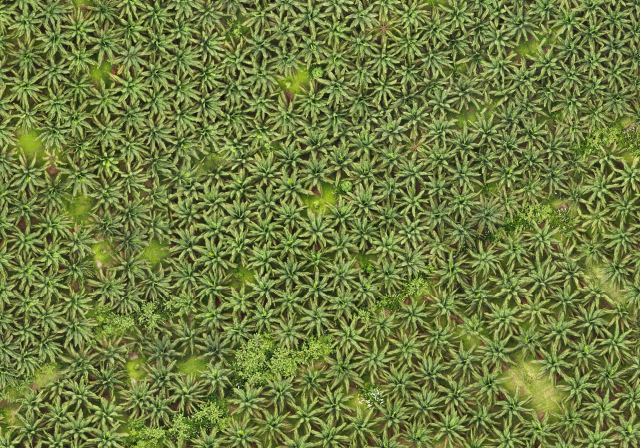

In [66]:
tile

In [87]:
tiles_dir = img_path.with_suffix(".tiles")
tiles_dir.mkdir(parents=True, exist_ok=True)

In [107]:
for i in range(len(y_offsets)):
    for j in range(len(x_offsets)):
        x_offset = x_offsets[j]
        y_offset = y_offsets[i]
        
        file_name = f"{i:02d}-{j:02d}-yoffset-{y_offset:05d}-xoffset-{x_offset:05d}-h{tile_height}-w{tile_width}.png"
        file_path = tiles_dir / file_name
        tile = img.crop((x_offset, y_offset, x_offset + tile_width, y_offset + tile_height))
        arr = tile.convert("HSV")
        value = np.array(arr)[:,:, 2]
        min_value, max_value = np.min(value), np.max(value)
        if min_value == 0 and max_value == 0:
            continue
        print(file_name)
        tile.save(file_path)
        

01-05-yoffset-00374-xoffset-03193-h448-w640.png
01-06-yoffset-00374-xoffset-03833-h448-w640.png
02-03-yoffset-00822-xoffset-01913-h448-w640.png
02-04-yoffset-00822-xoffset-02553-h448-w640.png
02-05-yoffset-00822-xoffset-03193-h448-w640.png
02-06-yoffset-00822-xoffset-03833-h448-w640.png
03-02-yoffset-01270-xoffset-01273-h448-w640.png
03-03-yoffset-01270-xoffset-01913-h448-w640.png
03-04-yoffset-01270-xoffset-02553-h448-w640.png
03-05-yoffset-01270-xoffset-03193-h448-w640.png
03-06-yoffset-01270-xoffset-03833-h448-w640.png
04-01-yoffset-01718-xoffset-00633-h448-w640.png
04-02-yoffset-01718-xoffset-01273-h448-w640.png
04-03-yoffset-01718-xoffset-01913-h448-w640.png
04-04-yoffset-01718-xoffset-02553-h448-w640.png
04-05-yoffset-01718-xoffset-03193-h448-w640.png
04-06-yoffset-01718-xoffset-03833-h448-w640.png
04-07-yoffset-01718-xoffset-04473-h448-w640.png
05-00-yoffset-02166-xoffset-00000-h448-w640.png
05-01-yoffset-02166-xoffset-00633-h448-w640.png
05-02-yoffset-02166-xoffset-01273-h448-w

In [103]:
arr = tile.convert("HSV")
value = np.array(arr)[:,:, 2]
mean_value, min_value, max_value = np.mean(value), np.min(value), np.max(value)
print(mean_value, min_value, max_value)

0.0 0 0


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(448, 640, 3), dtype=uint8)